In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
heart_disease = pd.read_csv("/content/drive/MyDrive/ai_dataset/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#create feature matrix
X = heart_disease.drop('target', axis = 1)

#create y (labels)
y = heart_disease['target']

In [5]:
#Choose the right model and hyperparamters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#We'll keep the default paramters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
#make predictions
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [9]:
y_test

74     1
191    0
96     1
69     1
176    0
      ..
38     1
279    0
164    1
235    0
158    1
Name: target, Length: 61, dtype: int64

In [10]:
#evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.8688524590163934

In [12]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.94      0.84      0.89        38

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[21,  2],
       [ 6, 32]])

In [14]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [15]:
#improve the model
np.random.seed(42)
for i in range(10,100,10):
  print(f"Trying model with {i} estimators...")
  clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
  print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
  print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 85.25%

Trying model with 40 estimators...
Model accuracy on test set: 85.25%

Trying model with 50 estimators...
Model accuracy on test set: 88.52%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 86.89%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [16]:
#Save the model and load it
import pickle

pickle.dump(clf, open("random_forst_model_1.pkl","wb"))


In [17]:
loaded_model = pickle.load(open('random_forst_model_1.pkl','rb'))
loaded_model.score(X_test, y_test)

0.8524590163934426

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt


In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
X.shape

(303, 13)

In [25]:
len(heart_disease)

303

# Make Sure it's all numerical

In [26]:
car_sales = pd.read_csv("/content/drive/MyDrive/ai_dataset/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
len(car_sales)

1000

In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
#Split data into x/y
X = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

In [30]:
#split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [31]:
#build machine learning model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder      #turn categories into numbers
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)], remainder= "passthrough")
model = RandomForestRegressor()
transformed_X = transformer.fit_transform(X)
transformed_X
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [33]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [34]:
#let's refit the model
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size = 0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
model.score(X_test, y_test)

0.2330485230539474

In [36]:
#How to handle missing values
#1. Fill them with some value also known as imputation
#2. Remove samples with missing data altogether

car_sales_missing = pd.read_csv("/content/drive/MyDrive/ai_dataset/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
car_sales_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing['Price']

In [40]:
#fill missing data with pandas
car_sales_missing['Make'].fillna("missing", inplace = True)

car_sales_missing['Colour'].fillna("missing", inplace = True)

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)

car_sales_missing['Doors'].fillna(4, inplace = True)


In [41]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [42]:
#Reomove rows with missing data
car_sales_missing.dropna(inplace = True)

In [43]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [44]:
len(car_sales_missing)

950

In [45]:
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [46]:
from sklearn.preprocessing import OneHotEncoder      #turn categories into numbers
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)], remainder= "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# Fill missing values with Scikit Learn

In [47]:
car_sales_missing = pd.read_csv("/content/drive/MyDrive/ai_dataset/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [48]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
#Drop the rows with no labels
car_sales_missing.dropna(subset = ['Price'],inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [50]:
X = car_sales_missing.drop('Price',axis = 1)
y = car_sales_missing['Price']

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill catrgorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value= "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

#Define Columns
cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#create an imputer(something that fills missing data)
imputer = ColumnTransformer([('cat_imputer',cat_imputer ,cat_features),
                             ("door_imputer", door_imputer, door_features),
                             ("num_imputer",num_imputer, num_features)])

#transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [52]:
car_sales_filled = pd.DataFrame(filled_X, columns = ['Make','Colour',"Doors",'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [53]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [54]:
from sklearn.preprocessing import OneHotEncoder      #turn categories into numbers
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)], remainder= "passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [55]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test , y_train, y_test = train_test_split(transformed_X, y , test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.21990196728583944

# Choosing Right Model for your Problem

In [56]:
#Get California Dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [57]:
housing_df = pd.DataFrame(housing['data'],columns = housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [58]:
housing_df['target'] =  housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [59]:
#Ridge regression model
from sklearn.linear_model import Ridge
np.random.seed(42)

X = housing_df.drop('target',axis = 1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440126

In [60]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop('target',axis = 1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

# Picking machine learning model for classification problem

In [61]:
heart_disease = pd.read_csv("/content/drive/MyDrive/ai_dataset/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
len(heart_disease)

303

In [63]:
#Linear SVC model
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)
X = heart_disease.drop('target', axis =1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = LinearSVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8688524590163934

In [64]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [65]:
#randomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

# If you have structured data use ensemble method
# if you have unstructured data use deep learning or transfer learning

# fit the model/algorithm

In [66]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)   #(training the machine learning model)

clf.score(X_test, y_test)    #(use the machine learning model)

0.8524590163934426

In [67]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [68]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Make prediction using machine learning model

In [69]:
#use predict() function

clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [70]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [71]:
#Compare predictions to truth tables to evaluat the model

y_pred = clf.predict(X_test)
np.mean(y_pred == y_test)

0.8524590163934426

In [72]:
clf.score(X_test, y_test)

0.8524590163934426

In [73]:
#another method
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.8524590163934426

In [74]:
#predict_proba() return probabilities of a classfication model
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [75]:
#let's predict on the same model
clf.predict(X_test[:5])       #here 1 is present because value on the 1 index is bigger, same for the 0

array([0, 1, 1, 0, 1])

In [76]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [77]:
#predictions with regression model (predict())

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [78]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis = 1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

In [79]:
y_preds = model.predict(X_test)
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [80]:
np.array([y_test[:10]])

array([[0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]])

In [81]:
len(y_preds)

4128

In [82]:
len(y_test)

4128

In [83]:
#compare predicted values to the truth values
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_test, y_preds)

0.3265721842781009

# Evaluating a model

In [84]:
#Evaluating a model with score method
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
clf.score(X_train, y_train)

1.0

In [86]:
clf.score(X_test, y_test)

0.8524590163934426

In [87]:
#score method on regression problem
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis = 1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

#the deafult score evaluation matrix is R2 (R sqaure)
model.score(X_train, y_train)

0.9736828565983116

In [88]:
model.score(X_test, y_test)

0.8066196804802649

# Evaluating a model using `Scoring` Paramter

In [89]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
clf.score(X_test, y_test)

0.8524590163934426

In [91]:
cross_val_score(clf, X,y, cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [92]:
clf_single_score = clf.score(X_test, y_test)

crv_mean = np.mean(cross_val_score(clf, X, y, cv = 10))

clf_single_score , crv_mean

(0.8524590163934426, 0.8346236559139785)

# Classification model evaluation metrices

### Accuracy

In [93]:
#Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

#clf.fit(X_train, y_train)

cross_score = cross_val_score(clf, X,y, cv = 5)

In [94]:
np.mean(cross_score)

0.8248087431693989

In [95]:
print(f"Heart Disease Classifier Cross Validated Accuracy Score: {np.mean(cross_score)*100: .2f}%")

Heart Disease Classifier Cross Validated Accuracy Score:  82.48%


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

clf.fit(X_train,y_train)

RandomForestClassifier()

### ROC Curve

In [97]:
#Area Under ROC curve (these curves are the comparison of model's true posiive rate(tpr) v/s false positive rate(fpr))
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [98]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [99]:
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

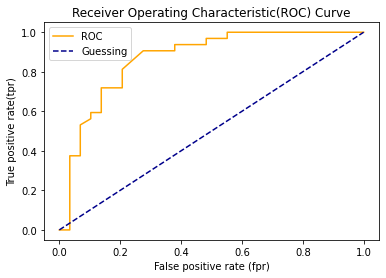

In [100]:
import matplotlib.pyplot as plt

#Create a function for making roc curves

def plot_roc_curve(fpr, tpr):

  plt.plot(fpr, tpr, color = "orange", label = "ROC")

  plt.plot([0,1],[0,1], color = "darkblue", linestyle = "--", label = "Guessing")

  plt.xlabel("False positive rate (fpr)")

  plt.ylabel("True positive rate(tpr)")

  plt.title("Receiver Operating Characteristic(ROC) Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

In [101]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)


0.8669181034482759

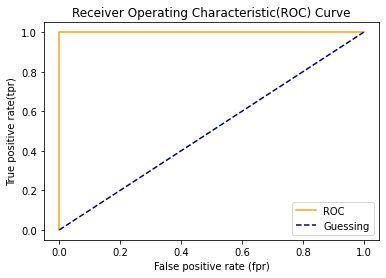

In [102]:
#plot perfect roc curve
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr) 

In [103]:
#perfect auc score

roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

In [104]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [105]:
#Visualize confusion matrix with pd crosstab()

pd.crosstab(y_test, y_preds, rownames = ["Actual_Labels"], colnames = ["Predicted_Labels"])

Predicted_Labels,0,1
Actual_Labels,,
0,23,6
1,6,26


In [106]:
len(y_preds)

61

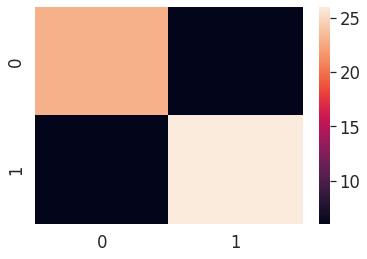

In [107]:
#Make our confusion matrix more visual with seaborn heatmap()
import seaborn as sbs

#set the font scale
sbs.set(font_scale = 1.5)

#create confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot confusion matrix using seaborn
sbs.heatmap(conf_mat)

In [108]:
#Create confusion matrix using scikit learn
from sklearn.metrics import ConfusionMatrixDisplay

In [109]:
clf

RandomForestClassifier()

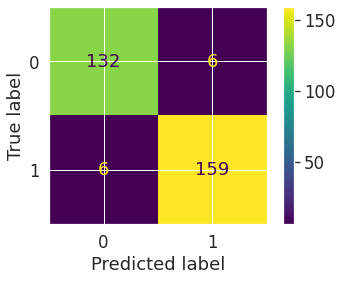

In [110]:
ConfusionMatrixDisplay.from_estimator(estimator= clf, X= X,  y= y)

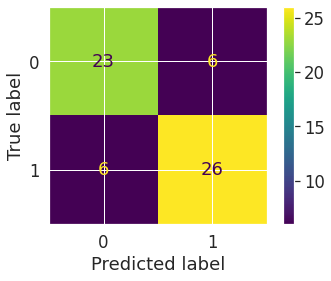

In [111]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds);

### Classification Report

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [113]:
#where precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict = True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# Regression Model Evaluation matrix

In [114]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis = 1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
model.score(X_test, y_test)

0.8066196804802649

In [116]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [117]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [118]:
y_test.mean()

2.0550030959302323

### R^2 (r-square)

In [119]:
from sklearn.metrics import r2_score

#fill the array with y_test mean values

y_test_mean = np.full(len(y_test), y_test.mean())

In [120]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [121]:
r2_score(y_true = y_test, y_pred = y_test_mean)

0.0

In [122]:
r2_score(y_true = y_test, y_pred = y_test)

1.0

### Mean Absoltue Error 

In [123]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [124]:
df = pd.DataFrame(data= {"actual values":y_test,
                         "predicted_values":y_preds})
df['differences'] = df['predicted_values'] - df['actual values']
df.head(10)

,actual values,predicted_values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [125]:
#MAE using formulas and differences
np.abs(df['differences']).mean()

0.3265721842781009

### Mean Squared Error

In [126]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test,y_preds)
mse

0.2534073069137548

In [127]:
df["squared_differences"] = np.square(df['differences'])
df.head()

,actual values,predicted_values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [128]:
sqaured = np.square(df['differences'])
sqaured.mean()

0.2534073069137548

In [129]:
df.iloc[0]

actual values          0.477000
predicted_values       0.493840
differences            0.016840
squared_differences    0.000284
Name: 20046, dtype: float64

In [130]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [131]:
df_large_error

,actual values,predicted_values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [132]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted_values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [133]:
df_large_error['squared_differences'].mean()

0.7333540351264799

### `Scoring` Paramter

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [135]:
np.random.seed(42)

#cross validation accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [136]:
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [137]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [138]:
print(f"The cross validated accuracy score is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy score is: 82.48%


In [139]:
#precision

np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [140]:
print(f"cross validated precision score is: {np.mean(cv_precision)}")

cross validated precision score is: 0.8329547346025924


In [141]:
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [142]:
print(f"cross validated recall score is: {np.mean(cv_recall)}")

cross validated recall score is: 0.8545454545454545


### `Scoring` Parameter for Regression Model

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis = 1)
y = housing_df['target']

model = RandomForestRegressor()

In [144]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv = 3)
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [145]:
np.mean(cv_r2)

0.6545756342466266

In [146]:
#mean absolute error
cv_mae = cross_val_score(model, X, y, cv = 3, scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.48487437131782957

In [147]:
#mean squared error
cv_mse = cross_val_score(model, X, y, cv = 3, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.461228671470042

# Using different evaluation metrics as Scikit Learn functions

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

np.random.seed(42)

#create X, y
X = heart_disease.drop("target", axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test, y_preds))
print("Precision: ",precision_score(y_test, y_preds))
print("Recall: ",recall_score(y_test, y_preds))
print("f1 Score: ",f1_score(y_test, y_preds))

Accuracy Score:  0.8524590163934426
Precision:  0.8484848484848485
Recall:  0.875
f1 Score:  0.8615384615384615


In [149]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("R2 score: ", r2_score(y_test, y_preds))
print("mae: ", mean_absolute_error(y_test, y_preds))
print("mse: ", mean_squared_error(y_test, y_preds))


R2 score:  0.8066196804802649
mae:  0.3265721842781009
mse:  0.2534073069137548


# Improving the Model

### Tuning Hyperparameter by Hand

In [150]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [151]:
def evaluate_preds(y_true, y_preds):

# Performs evaluation comparison between y_true and y_preds labels on classification model
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)

  metric_dict = {"accuracy ": round(accuracy, 2),
                 "precision ": round(precision, 2),
                 "f1 score ": round(f1, 2),
                 "recall ": round(recall, 2)}

  print(f"Acc: {accuracy*100:.2f}%")
  print(f"Precision: {precision:.2f}%")
  print(f"f1: {f1:.2f}%")
  print(f"recall: {recall:.2f}%")

  return metric_dict


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

heart_disease_shuffled = heart_disease.sample(frac = 1)

X = heart_disease_shuffled.drop('target', axis =1)
y = heart_disease_shuffled['target']

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split: valid_split], y[train_split: valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

#evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 75.56%
Precision: 0.69%
f1: 0.77%
recall: 0.86%


{'accuracy ': 0.76, 'f1 score ': 0.77, 'precision ': 0.69, 'recall ': 0.86}

In [153]:
np.random.seed(42)

clf2 = RandomForestClassifier(n_estimators = 100)

clf2.fit(X_train, y_train)

y_preds2 = clf2.predict(X_valid)

clf2_metrics = evaluate_preds(y_valid, y_preds2)

Acc: 75.56%
Precision: 0.68%
f1: 0.78%
recall: 0.90%


### Tuning Hyperparameter with RandomizedsearchCV

In [154]:

from sklearn.model_selection import RandomizedSearchCV

grid = {
        "max_depth": [None, 5, 10, 20, 25],
        "max_features":["auto","sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}


np.random.seed(42)

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier(n_jobs = 1)

rs_clf = RandomizedSearchCV(estimator = clf,
                              param_distributions = grid,
                              n_iter = 10,            #number of models to try
                              cv = 5,
                              verbose = 2)
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END max_

In [155]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 80.33%
Precision: 0.86%
f1: 0.83%
recall: 0.81%


### Hyperparamter tuning using GridSearchCV

In [156]:
grid

{'max_depth': [None, 5, 10, 20, 25],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6]}

In [157]:
#GridSearchCV goes through every parameter and perform calculation on every possible combination.
5*2*3*3*6

540

In [158]:
grid2 = {
        "max_depth": [None],
        "max_features":["auto","sqrt"],
        "min_samples_split": [6],
        "min_samples_leaf": [1,2]}


In [159]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier(n_jobs = 1)

gs_clf = GridSearchCV(estimator = clf,
                              param_grid = grid2,
                                      
                              cv = 5,
                              verbose = 2)
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV]

In [160]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 77.05%
Precision: 0.83%
f1: 0.81%
recall: 0.78%


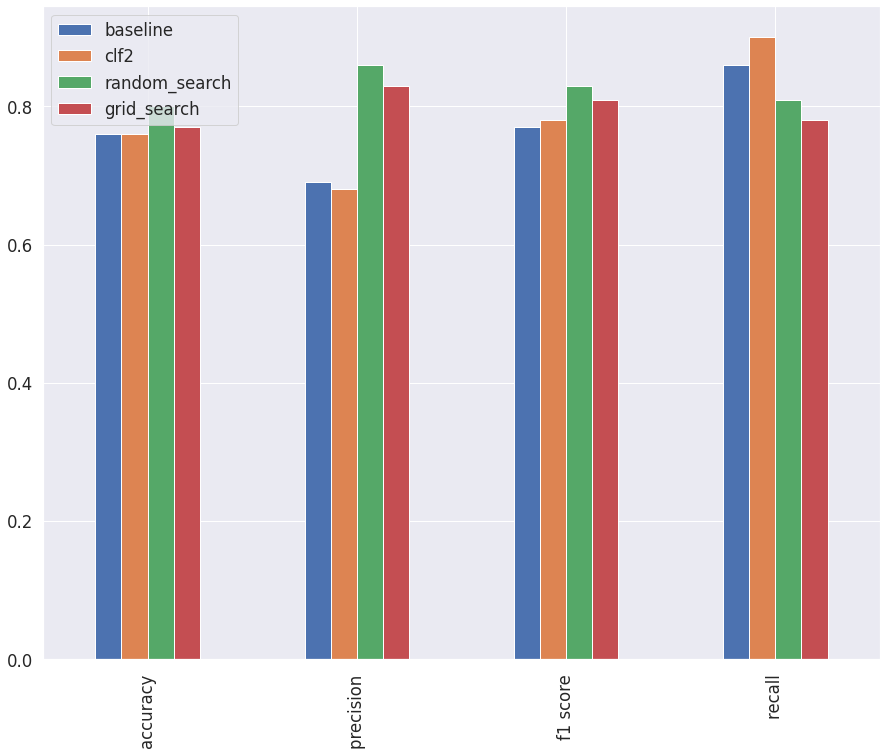

In [161]:
#Let's Compare our different models

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf2": clf2_metrics,
                                "random_search": rs_metrics,
                                "grid_search": gs_metrics})

compare_metrics.plot.bar(figsize = (15,12));

# Saving and loading the Machine learning Model

### Pickle

In [162]:
import pickle

pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))              #.pkl is used here due to pickle

In [163]:
#loaded a saved model

loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl","rb"))

In [164]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 77.05%
Precision: 0.83%
f1: 0.81%
recall: 0.78%


{'accuracy ': 0.77, 'f1 score ': 0.81, 'precision ': 0.83, 'recall ': 0.78}

### Joblib

In [165]:
from joblib import dump, load

dump(gs_clf, filename = "gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [166]:
loaded_joblib_model = load(filename = "gs_random_forest_model_1.joblib")

In [167]:
loaded_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, loaded_y_preds)

Acc: 77.05%
Precision: 0.83%
f1: 0.81%
recall: 0.78%


{'accuracy ': 0.77, 'f1 score ': 0.81, 'precision ': 0.83, 'recall ': 0.78}

# Putting it all together!

In [168]:
data = pd.read_csv("/content/drive/MyDrive/ai_dataset/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [169]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [170]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [172]:
# import pandas as pd
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.pipeline import Pipeline



# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV



# import numpy as np
# np.random.seed(42)



# data = pd.read_csv("/content/drive/MyDrive/ai_dataset/car-sales-extended-missing-data.csv")
# data.dropna(subset = ["Price"], inplace = True)

# categorical_features = ["Make","Colour"]
# categorical_transformer =  Pipeline(steps = [("imputer", SimpleImputer(strategy = "constant", fill_value = "missing"),
#                                               "onehot", OneHotEncoder(handle_unknown = "ignore"))])

# door_features = ["Doors"]
# door_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy = "constant", fil_value = 4))])

# numeric_feature = ["Odometer (KM)"]
# numeric_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy = "mean"))])



# preprocessor = ColumnTransformer(transformer = [("cat", categorical_transformer, categorical_features),
#                                                 ("door", door_transformer, door_features),
#                                                 ("num", numeric_transformer, numeric_feature)])


# model = Pipeline(steps = [("preprocessor", preprocessor),
#                           ("model", RandomForestRegressor())])



# X = data.drop("Price", axis =1)
# y = data["Price"]

# X_test, X_train, y_test, y_train = train_test_split(X,y, test_Size = 0.2)

# model.fit(X_train, y_pred)
# model.score(X_test, y_test)